# TASK 1

## HOUSE PRICE PREDICTION USING LINEAR REGRESSION

### IMPORTS

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [69]:
data=pd.read_csv("Delhi.csv")

### EDA

In [70]:
data

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000,"Noida Extension, Noida, Delhi NCR",1350,28.608850,77.460560,3,3,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,28.374236,76.952416,3,3,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,28.645769,77.385110,4,5,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050,28.566914,77.436434,2,2,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,28.520732,77.356491,2,2,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000,"Indirapuram, Ghaziabad, Delhi NCR",1095,28.635272,77.370395,2,2,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.611872
7734,7734,4510000,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060,28.581431,77.452819,2,2,3.0,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.716981
7735,7735,7000000,"Crossings Republik, Ghaziabad, Delhi NCR",1898,28.625850,77.435336,4,3,5.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.092729
7736,7736,6500000,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400,28.701622,77.430153,3,3,2.0,Ready to Move,Resale,1.0,NaN,3.0,vvip mall,Flat,\n \n \n...,4642.857143


In [71]:
data.dtypes

Unnamed: 0            int64
price                 int64
Address              object
area                  int64
latitude            float64
longitude           float64
Bedrooms              int64
Bathrooms             int64
Balcony             float64
Status               object
neworold             object
parking             float64
Furnished_status     object
Lift                float64
Landmarks            object
type_of_building     object
desc                 object
Price_sqft          float64
dtype: object

In [72]:
data.dropna(inplace=True)

In [73]:
data

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
10,10,7300000,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",850,28.724075,77.095581,3,2,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by shri jagannath mandir,Flat,\n\n\n 3 BHK se...,8588.235294
15,15,9500000,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",1000,28.721436,77.107018,3,2,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by the sovereign school,Individual House,\n \n \n...,9500.000000
16,16,15000000,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",1450,28.727213,77.096062,4,3,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by shri jagannath mandir,Individual House,\n\n\n 4 BHK th...,10344.827590
18,18,5100000,"NeelPadam Kunj, Vaishali, Sector 1, Ghaziabad,...",1087,28.644310,77.331787,2,2,2.0,Ready to Move,Resale,1.0,Semi-Furnished,2.0,Prime location surrounded by malls and hospita...,Flat,\n\n\n Complex ...,4691.812328
30,30,9000000,"sector 103 gurgaon, Dwarka Expressway, Gurgaon...",1481,28.497450,77.027092,2,2,2.0,Ready to Move,Resale,2.0,Unfurnished,2.0,near gurgaon railway station,Flat,\n \n \n...,6076.975017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,7454,4600000,"IP Colony, Sector 49, Faridabad, Sector 49, Fa...",900,28.392095,77.267223,3,2,1.0,Ready to Move,Resale,1.0,Semi-Furnished,0.0,Schools/Play Schools/ Shopping center/Banks in...,Flat,\n \n \n...,5111.111111
7499,7499,7000000,"Sector 6 Vaishali, Ghaziabad, Delhi NCR",1200,28.648588,77.353339,3,2,2.0,Ready to Move,Resale,1.0,Furnished,0.0,1.5Kms away from Vaishali Metro Station. 2 Kms...,Flat,\n \n \n...,5833.333333
7537,7537,4000000,"17. th floor, Sector 134, Noida, Delhi NCR",942,28.500751,77.380900,2,2,1.0,Ready to Move,Resale,1.0,Unfurnished,2.0,"Multiple schools, corporate offices and reside...",Flat,\n \n \n...,4246.284501
7663,7663,14100000,"Rajendra Nagar Ghaziabad, Gulmohur Greens, Gha...",2550,28.636213,77.433601,3,3,3.0,Ready to Move,Resale,2.0,Semi-Furnished,2.0,Near Hindon Airforce Station,Flat,\n \n \n...,5529.411765


In [74]:
data.reset_index(inplace=True, drop=True)

In [75]:
data

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,10,7300000,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",850,28.724075,77.095581,3,2,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by shri jagannath mandir,Flat,\n\n\n 3 BHK se...,8588.235294
1,15,9500000,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",1000,28.721436,77.107018,3,2,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by the sovereign school,Individual House,\n \n \n...,9500.000000
2,16,15000000,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",1450,28.727213,77.096062,4,3,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by shri jagannath mandir,Individual House,\n\n\n 4 BHK th...,10344.827590
3,18,5100000,"NeelPadam Kunj, Vaishali, Sector 1, Ghaziabad,...",1087,28.644310,77.331787,2,2,2.0,Ready to Move,Resale,1.0,Semi-Furnished,2.0,Prime location surrounded by malls and hospita...,Flat,\n\n\n Complex ...,4691.812328
4,30,9000000,"sector 103 gurgaon, Dwarka Expressway, Gurgaon...",1481,28.497450,77.027092,2,2,2.0,Ready to Move,Resale,2.0,Unfurnished,2.0,near gurgaon railway station,Flat,\n \n \n...,6076.975017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,7454,4600000,"IP Colony, Sector 49, Faridabad, Sector 49, Fa...",900,28.392095,77.267223,3,2,1.0,Ready to Move,Resale,1.0,Semi-Furnished,0.0,Schools/Play Schools/ Shopping center/Banks in...,Flat,\n \n \n...,5111.111111
325,7499,7000000,"Sector 6 Vaishali, Ghaziabad, Delhi NCR",1200,28.648588,77.353339,3,2,2.0,Ready to Move,Resale,1.0,Furnished,0.0,1.5Kms away from Vaishali Metro Station. 2 Kms...,Flat,\n \n \n...,5833.333333
326,7537,4000000,"17. th floor, Sector 134, Noida, Delhi NCR",942,28.500751,77.380900,2,2,1.0,Ready to Move,Resale,1.0,Unfurnished,2.0,"Multiple schools, corporate offices and reside...",Flat,\n \n \n...,4246.284501
327,7663,14100000,"Rajendra Nagar Ghaziabad, Gulmohur Greens, Gha...",2550,28.636213,77.433601,3,3,3.0,Ready to Move,Resale,2.0,Semi-Furnished,2.0,Near Hindon Airforce Station,Flat,\n \n \n...,5529.411765


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        329 non-null    int64  
 1   price             329 non-null    int64  
 2   Address           329 non-null    object 
 3   area              329 non-null    int64  
 4   latitude          329 non-null    float64
 5   longitude         329 non-null    float64
 6   Bedrooms          329 non-null    int64  
 7   Bathrooms         329 non-null    int64  
 8   Balcony           329 non-null    float64
 9   Status            329 non-null    object 
 10  neworold          329 non-null    object 
 11  parking           329 non-null    float64
 12  Furnished_status  329 non-null    object 
 13  Lift              329 non-null    float64
 14  Landmarks         329 non-null    object 
 15  type_of_building  329 non-null    object 
 16  desc              329 non-null    object 
 1

In [77]:

data=data[['area','Bedrooms','Bathrooms','Balcony','type_of_building','Furnished_status','Price_sqft','price']]

In [78]:
data

,area,Bedrooms,Bathrooms,Balcony,type_of_building,Furnished_status,Price_sqft,price
0,850,3,2,1.0,Flat,Semi-Furnished,8588.235294,7300000
1,1000,3,2,1.0,Individual House,Semi-Furnished,9500.000000,9500000
2,1450,4,3,1.0,Individual House,Semi-Furnished,10344.827590,15000000
3,1087,2,2,2.0,Flat,Semi-Furnished,4691.812328,5100000
4,1481,2,2,2.0,Flat,Unfurnished,6076.975017,9000000
...,...,...,...,...,...,...,...,...
324,900,3,2,1.0,Flat,Semi-Furnished,5111.111111,4600000
325,1200,3,2,2.0,Flat,Furnished,5833.333333,7000000
326,942,2,2,1.0,Flat,Unfurnished,4246.284501,4000000
327,2550,3,3,3.0,Flat,Semi-Furnished,5529.411765,14100000


In [79]:
data.isnull().sum()

area                0
Bedrooms            0
Bathrooms           0
Balcony             0
type_of_building    0
Furnished_status    0
Price_sqft          0
price               0
dtype: int64

In [80]:
data.duplicated().sum()

7

In [81]:
data=data.drop_duplicates()

In [82]:
data

,area,Bedrooms,Bathrooms,Balcony,type_of_building,Furnished_status,Price_sqft,price
0,850,3,2,1.0,Flat,Semi-Furnished,8588.235294,7300000
1,1000,3,2,1.0,Individual House,Semi-Furnished,9500.000000,9500000
2,1450,4,3,1.0,Individual House,Semi-Furnished,10344.827590,15000000
3,1087,2,2,2.0,Flat,Semi-Furnished,4691.812328,5100000
4,1481,2,2,2.0,Flat,Unfurnished,6076.975017,9000000
...,...,...,...,...,...,...,...,...
324,900,3,2,1.0,Flat,Semi-Furnished,5111.111111,4600000
325,1200,3,2,2.0,Flat,Furnished,5833.333333,7000000
326,942,2,2,1.0,Flat,Unfurnished,4246.284501,4000000
327,2550,3,3,3.0,Flat,Semi-Furnished,5529.411765,14100000


In [83]:
data.duplicated().sum()

0

In [84]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,322.0,1.535398e+03,7.469509e+02,5.400000e+02,1.000000e+03,1.322500e+03,1.880000e+03,4.545000e+03
Bedrooms,322.0,2.881988e+00,7.180701e-01,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
Bathrooms,322.0,2.636646e+00,8.399814e-01,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Balcony,322.0,2.046584e+00,9.957875e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Price_sqft,322.0,6.706306e+03,3.224009e+03,2.599244e+03,4.484403e+03,5.812920e+03,8.229665e+03,2.407407e+04
price,322.0,1.127311e+07,9.728892e+06,1.950000e+06,4.700000e+06,7.500000e+06,1.440000e+07,6.500000e+07


<Axes: xlabel='Balcony', ylabel='Bedrooms'>

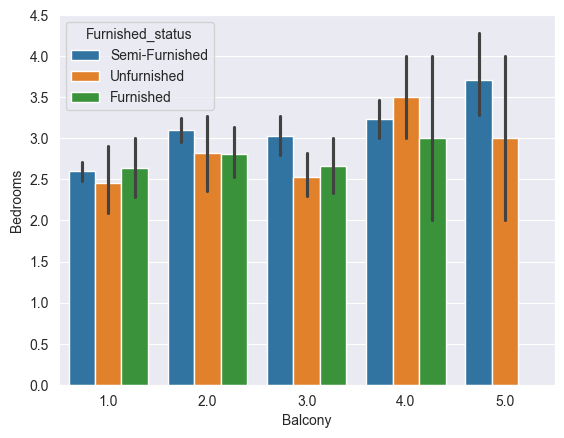

In [85]:
sns.barplot(x=data['Balcony'],y=data['Bedrooms'],hue=data['Furnished_status'])

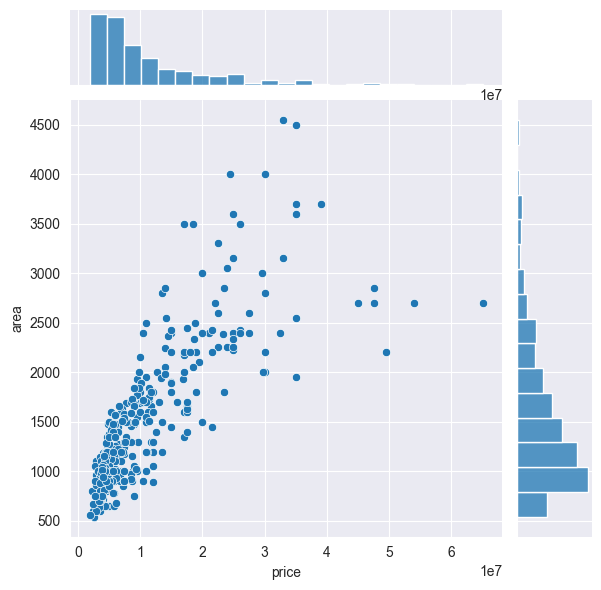

In [86]:
sns.jointplot(x=data['price'],y=data['area'])

In [87]:
sns.heatmap(data.corr(),cmap='crest',annot=True)

ValueError: could not convert string to float: 'Flat'

In [ ]:
sns.histplot(x=data['price'])

In [ ]:
data.info()

### CONVERTING CATEGORICAL FEATURES INTO NUMERICAL FEATURES

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['type_of_building','Furnished_status']
le=LabelEncoder()
for col in cols:
    data[col]=le.fit_transform(data[col])

In [ ]:
data


### TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('price',axis=1)
y=data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape


In [ ]:
X_test.shape

In [ ]:
model=LinearRegression().fit(X_train,y_train)
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:
print(model.score(X_tes))